# Build a Basic Neural Network

In [98]:
# import out dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

### scikit-learn's make_blobs creates sample values and contains many parameters that cgange the shape and values of the sample dataset. For our purposes, we use it to create 1000 samples with two features (x-axis and y-axis) that are linearly separable into two groups


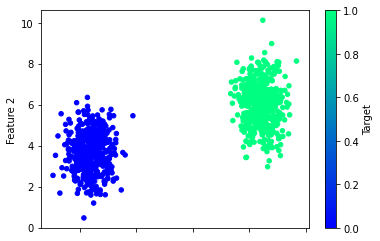

In [99]:
# generate dummy dataset
X,y = make_blobs(n_samples = 1000, centers = 2, n_features = 2, random_state = 78)

# creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns = ['Feature 1', 'Feature 2'])
df['Target'] = y

# plotting the dummy data
df.plot.scatter(x='Feature 1', y='Feature 2', c='Target', colormap = 'winter')

### once we have our dummy data generated, we split data into training and testing dataset using scikit-learn's train_test_split

In [100]:
# use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 78)

### now we have training data, we need to prepare the dataset for our neural network model. like other machine learning algorithm, it is crucial to normalize or standardize our numerical variables to ensure that our neural network does not focus on outliers and can apply proper weights to each output. 

### In most cases, the more that input variables are normalized to the same scale, the more stable the neural network model is and the better neural network model will generalize

In [101]:
# create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## we have our data ready for our first neural network model. first we must create our sequential model

In [102]:
# create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

### the nn_model object will store the entire architecture of our neural network model. Next, we add our first layer which will contain our inputs and hidden layer of neurons

### we add layers to our sequential model using Keras' Dense class

### input_dim parameter indicates how many inputs will be in the model
### units parameter indicates how many neurons we want in the hidden layer
### activation parameter indicates which activation function to use

In [103]:
# add our first dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units = 1, activation='relu', input_dim= 2))

### now we need to supply the number of output neurons. for classification model, we only want yes or no binary decision therefore we only need one output neuron.

### we used ReLU function to enable nonlinear relationships, however for our classification output we want to use a sigmoid activation function to produce a probability output

In [104]:
# add the output layer that uses probability activation function
nn_model.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))

## Now we have added our layers to the Sequential model, we can double check our model structure using the summary method

In [105]:
# check the structure of the sequential model
nn_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 1)                 3         
                                                                 
 dense_12 (Dense)            (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


### **Compiling** : the process of informing the model how it should learn and train 

### **Optimization Function** : shapes and molds a nrural network model while it is being trained and ensure that it performs to the best of its ability

### **Loss Metric** : is used by machine learning algorithms to score the performance of the model through each iteration and epoch by evaluating the inaccuracy of a single input

### **Evaluation Metric** : measures the quality of the machine learning model. 2types: model predictive accuracy and model mean squared error

In [106]:
# compile the sequential model together and customize metrics
nn_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
# we use the adam optimizer which uses a graient descent approach to ensur ethat the algorithm will not get stuck on weaker classifying variables and features
# for the loss function, we will use binary_crossentropy which specifically designed to evaluate a binary classification model

# **Train and Test a Basic Neural Network**

In [107]:
# fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs = 100)
# each epoch is a complete pass through the training data. like tensorflow playground

Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 0.7789 - accuracy: 0.0533
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7667 - accuracy: 0.0440
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7564 - accuracy: 0.0480
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7469 - accuracy: 0.0600
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7391 - accuracy: 0.0653
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7324 - accuracy: 0.0760
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7264 - accuracy: 0.0880
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7212 - accuracy: 0.0960
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7168 - accuracy: 0.1120
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7129 - accuracy: 0.1253
Epoch 11/

### looking above the model training output. we know the loss metric was 0.0712 and the predictive accuracy is 1.0. this means that although our model performance had more loss than the simulation data, the model correctly classifies all of our training data which is sufficient for our need. 

### when training completes, the model object stores the loss and accuracy metrics across all epochs which we can use to visualize the traing progress


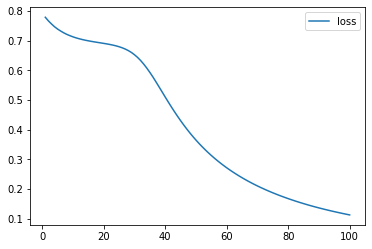

In [108]:
# crate a dataframe containing training history
history_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))

# plot the loss
history_df.plot(y='loss')

### similarly we can plot the accuracy over time using the same DataFrame

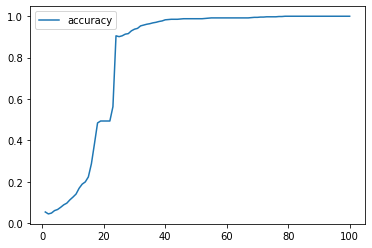

In [109]:
# plot the accuracy
history_df.plot(y='accuracy')

In [110]:
# evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=2)
print(f'Loss: {model_loss}, Accuracy: {model_accuracy}')

# from the output, the model is correctly classify data it was not trained on 100% of the time
# it is important to establish model performance thresholds before designing any machin learning model
# depending on the type of data and the use case, we may have to recreate and retrain a model using different parameters, different training/testing data or even look to use a different model entirely

8/8 - 0s - loss: 0.1055 - accuracy: 1.0000 - 135ms/epoch - 17ms/step
Loss: 0.10550287365913391, Accuracy: 1.0


### we have a trained neural network model and we have verified its performance using a test dataset, we cn apply this model to novel datasets and predict the classification of a data point
### we can use the predict method to generate predictions on new data

In [111]:
# predict the classification of a new set of blob data
new_X, new_y = make_blobs(n_samples = 10, centers = 2, n_features=2, random_state = 78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype('int32')

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]], dtype=int32)

# **Nuances of Neural Networks on Nonlinear Numbers**

### a simple linear regression and singular perceptron models wotk really well as a binary classifier when the data is linearly separable.

## but what about nonlinear data? 
### to test this bahavior, lets generate some new dummy data. this time we will generate some nonlinear moon-shaped data using scikit-learn's make_moons method and visualize it using pd and matplotlib

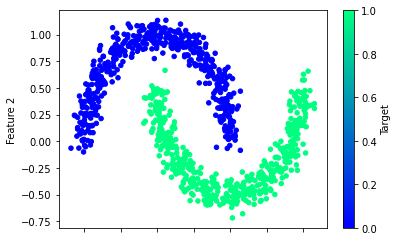

In [112]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [113]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [114]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 2ms/step - loss: 1.1546 - accuracy: 0.3933
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 1.0287 - accuracy: 0.4160
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.9441 - accuracy: 0.4320
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8866 - accuracy: 0.4560
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8449 - accuracy: 0.4720
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8135 - accuracy: 0.4880
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7881 - accuracy: 0.5027
Epoch 8/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7670 - accuracy: 0.5213
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7487 - accuracy: 0.5333
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7323 - accuracy: 0.5413
Epoch 11/

### this time our single-neuron, single-layer neural network was unable to accurately classify all of our training data

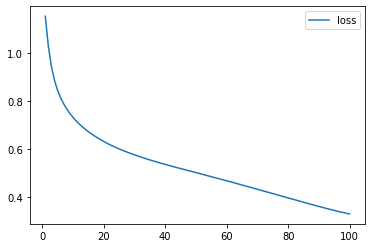

In [115]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

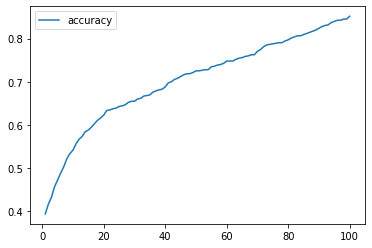

In [116]:
# Plot the accuracy
history_df.plot(y="accuracy")

# **Create the Connective Tissue, the Multiple Neuron Neutral Network**

## Advantages for adding neurons to our hidden layer in a neural network :
### 1: there is a distributed effort to find optimal weights - faster
### 2: each neuron can focus on different features to identify nonlinear effects - smarter
### 3: it is less likely to fixate on complex variables - more robust



## Two main reasons to limit the number of neurons in a neural network model : overfitting and computation resources 
### overfitting: the neural network will not generalize well and won't be able to classify new data correctly 
### a neural network model with a large number of neurons requires equally large training dataset- training a large neural network requires more data, more epochs and more time.

## A good rule of thumb for a basic neural network is to have two to three times the amount of neurons in the hidden layer as the number of inputs.

In [117]:
# since we want to change the structure of our neural network model , we first create a new sequential model 

# generage our nre sequential model
new_model = tf.keras.models.Sequential()

In [118]:
# we want to use 6 neurons by changeing the units parameter

# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [119]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.9550 - accuracy: 0.4680
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8930 - accuracy: 0.4933
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 0.8367 - accuracy: 0.5120
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7859 - accuracy: 0.5387
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7392 - accuracy: 0.5813
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6964 - accuracy: 0.6267
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6567 - accuracy: 0.6720
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6205 - accuracy: 0.7120
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5864 - accuracy: 0.7533
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5555 - accuracy: 0.7613
Epoch 11/

### by looking the output above, we increase the number of neurons within the hidden layer, the classification accuracy improves. 

# **Preprocessing**

## **Categorical Variables**

### preprocess the values using a technique called 
### **one-hot encoding** : identifies all unique column values and split the single categorical column into a series of columns, each containing info about a single unique categorical value. 

### categorical variables with a large number of unique values might become difficult to navigate or filter once encoded. then we must reduce the number of unique values in the categorical variables. the precess is called **bucketing** or **binning**. bucketing data typically follows one of two approaches:
#### 1. collapse all of the infrequent and rare categorical values into a single 'other' category
#### 2. create generalized categorical values and reassign all data points to the new corresponding values.



## **Practice**

In [120]:
# Import our dependencies
import pandas as pd
import sklearn as skl

# Read in our ramen data
ramen_df = pd.read_csv("ramen-ratings.csv")

# Print out the Country value counts
country_counts = ramen_df.Country.value_counts()
country_counts

# in a hypothetical scenario, we need to use the 'country' variable as a categorical variable in a large dataset that will predict restaurant satisfication
# before we convert country into a one-hot encoding, we need to make sure that there are not too many unique values
# we need to check for unique values is to use the pd dataframe's value_counts method

Japan            352
USA              323
South Korea      309
Taiwan           224
Thailand         191
China            169
Malaysia         156
Hong Kong        137
Indonesia        126
Singapore        109
Vietnam          108
UK                69
Philippines       47
Canada            41
India             31
Germany           27
Mexico            25
Australia         22
Netherlands       15
Myanmar           14
Nepal             14
Pakistan           9
Hungary            9
Bangladesh         7
Colombia           6
Brazil             5
Cambodia           5
Fiji               4
Holland            4
Poland             4
Finland            3
Sarawak            3
Sweden             3
Dubai              3
Ghana              2
Estonia            2
Nigeria            1
United States      1
Name: Country, dtype: int64

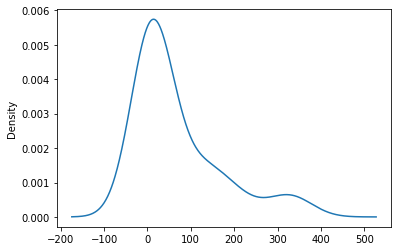

In [121]:
# how do we determine which countries are uncommon enough to bucket into the 'other' categoru?
# most straightforward method is to use a density plot to identify where the value counts 'fall off' and set the threshold within this region

# visualize the value counts
country_counts.plot.density()

### According to the density plot, the most common unique values have more than 100 instances within the dataset. Therefore, we can bucket any country that appears fewer than 100 times in the dataset as "other." To do this, we'll use a Python for loop and Pandas' replace method. 

In [122]:
# determine which values to replace
replace_countries = list(country_counts[country_counts < 100].index)

# replace in DataFrame
for country in replace_countries:
    ramen_df.Country = ramen_df.Country.replace(country,'Other')
    
# check to make sure binning was successful
ramen_df.Country.value_counts()

Other          376
Japan          352
USA            323
South Korea    309
Taiwan         224
Thailand       191
China          169
Malaysia       156
Hong Kong      137
Indonesia      126
Singapore      109
Vietnam        108
Name: Country, dtype: int64

### now we are ready to transpose the variable using one-hot encoding. we use scikit-learn's OneHotEncoder module on the country variable

In [123]:
# create the onehotencoder instance
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(ramen_df.Country.values.reshape(-1,1)))

# rename encoded columns
encode_df.columns = enc.get_feature_names(['Country'])
encode_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Country_China,Country_Hong Kong,Country_Indonesia,Country_Japan,Country_Malaysia,Country_Other,Country_Singapore,Country_South Korea,Country_Taiwan,Country_Thailand,Country_USA,Country_Vietnam
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### then we must join the encoded dataframe with the original and drop the original country column. we use merge method

In [124]:
# merge the two dataframes together and drop the country column
ramen_df.merge(encode_df, left_index = True, right_index=True).drop('Country',1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,Review #,Brand,Variety,Style,Stars,Top Ten,Country_China,Country_Hong Kong,Country_Indonesia,Country_Japan,Country_Malaysia,Country_Other,Country_Singapore,Country_South Korea,Country_Taiwan,Country_Thailand,Country_USA,Country_Vietnam
0,2580,New Touch,T's Restaurant Tantanmen,Cup,3.75,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,2.25,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,2.75,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2576,Ching's Secret,Singapore Curry,Pack,3.75,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,3.5,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2577,3,Wai Wai,Tom Yum Shrimp,Pack,2,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,2,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# **Standardization**

## there are many reasons why a raw numeric variable is insufficient for use when training a neural network model:
### 1. raw data often has outliers or extreme values that can artifically inflate a variable's importance
### 2. numerical data can be measured using different units across a dataset such as time vs temperature or length vs volume
### 3. the distribution of a variable can be skewed, leading to misinterpretation of the central tendency

## there is a great probability that the neural network model will interpret the raw numerical data inappropriately. 

## So! we should minimize this risk by standardizing (AKA normalization) the numerical data prior to training

## Standardization Practice

### If we use the StandardScaler module to standardize our numerical variables, we reduce the overall likelihood that outliers, variables of different units or skewed distributions will have a negative impact on model's performance

In [125]:
# Import our dependencies
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Read in our dataset
hr_df = pd.read_csv("hr_dataset.csv")
hr_df.head()

,Satisfaction_Level,Num_Projects,Time_Spent,Num_Promotions
0,0.30,1,253,2
1,0.25,1,200,0
2,0.90,4,2880,5
3,0.65,3,1450,3
4,0.50,2,785,2


In [126]:
# create the standardscaler instance
scaler = StandardScaler()

In [127]:
# fit the standardscaler
scaler.fit(hr_df)

StandardScaler()

In [128]:
# scale the data
scaled_data = scaler.transform(hr_df)

In [129]:
# create a dataframe with the scaled data
transformed_scaled_data = pd.DataFrame(scaled_data, columns = hr_df.columns)
transformed_scaled_data.head()

,Satisfaction_Level,Num_Projects,Time_Spent,Num_Promotions
0,-1.303615,-1.162476,-1.049481,-0.558656
1,-1.512945,-1.162476,-1.094603,-1.804887
2,1.208335,0.860233,1.187080,1.310692
3,0.161689,0.185996,-0.030385,0.064460
4,-0.466299,-0.488240,-0.596549,-0.558656


### all of the variables have now been standardized with mean value of 0 and standard deviation of 1. Now the data is ready to be passed along to our neural network model

# **Deep Learning Models**

## there are limitations to using a basic neural network such as : 

### 1. a basic neural network with many neurons will require more training data than other comparable statistics and machine learning models to produce an adequate model

### 2. basic neural networks struggle to interpret complex nonlinear numerical data or data with many confounding factors that have hidden effects on more than one variabale

### 3. basic neural networks are incapable of analyzing image datasets without severe data preprocessing.


## to address the limations of the basic neural network, we can implement a more robust neural network model by adding additional hidden layers. 

## a neural network with more than one hidden layer is known as **deep neural network** or commonly referred to as **deep learning models**

## the next layer of neurons can evaluate higher order interactions between weighted variables and identify complex, nonlinear relationships across the entire dataset. The additional layers can identify and account for more information than any number of neurons in a single hidden layer.

## **deep learning models** can identify patterns, determine severity and adapt to changing input data from a wide variety of data sources. compared to basic neural network models, deep learning models only need a few neurons across a few hidden layers to identify the same nonlinear characteristics.

## **deep learning models** can train on images, natural language data, soundwaves and traditional tabular data(data that fits in a table or DataFrame, all with minimal preprocessing and directions

# Deep Learning Model Practice

In [176]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

# Import our input dataset
attrition_df = pd.read_csv('HR-Employee-Attrition.csv')
attrition_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


### there are multiple columns with categorical values as well as our numerical value. To make things easier, we should generate a list of categorical variable names. 

In [177]:
# generate our categorical variable list
attrition_cat = attrition_df.dtypes[attrition_df.dtypes=='object'].index.tolist()
attrition_cat

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

### we have our variable names sperated, we can start to preprocess our data starting with the one-hot encoding of the categorical data. looking at our attrition_cat, there are 8 categorical variables that need encoding. before using the scikit-learn's OneHotEncoder, we need to make asure that none of the categorical variables have more than 10 unique values and require bucketing


In [178]:
# check the number of unique values in each column
attrition_df[attrition_cat].nunique()

Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
Over18            1
OverTime          2
dtype: int64

In [179]:
# create a OneHotEncoder instance
enc = OneHotEncoder(sparse = False)

# fit and transform the OneHotEncoder useing the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(attrition_df[attrition_cat]))

# add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(attrition_cat)
encode_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Attrition_No,Attrition_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [180]:
# merge one-hot encoded features and drop the originals
attrition_df = attrition_df.merge(encode_df, left_index = True, right_index = True)
attrition_df = attrition_df.drop(attrition_cat,1)
attrition_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_No,Attrition_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


## split training and test data

### we use the Attrition_Yes column as the y or target feature and the model input features will be all the columns except Attrition_Yes and Attrition_No

In [181]:
# Split our preprocessed data into our features and target arrays
y = attrition_df["Attrition_Yes"].values
X = attrition_df.drop(["Attrition_Yes","Attrition_No"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [182]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## hidden layers, neurons, output layers

### input layer: we must add the number of input features equal to the number of variables in our feature DataFrame

### hidden layers: our deep learning model structure will be slightly different-we will add two hidden layers with only a few neurons in each layer. To create the second hidden layer, we will add another Keras Dense class while defining our model, all of our hidden layers will use ReLU to identify non linear characteristics from the input values

### output layer: we will use the same parameters from our basic neural network including the sigmoid activation function. The sigmoid will help us predict the probability that an employee is at risk for attrition.

In [183]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
# number_input_features = 55
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 8)                 448       
                                                                 
 dense_33 (Dense)            (None, 5)                 45        
                                                                 
 dense_34 (Dense)            (None, 1)                 6         
                                                                 
Total params: 499
Trainable params: 499
Non-trainable params: 0
_________________________________________________________________


### we can see that the number of weight parameters(weight coefficients) for each layer equals the number of input values times the number of neurons plus a bias term for eacn neuron. 

### first layer: 55 input values x 8 neurons + 8 bias terms for each neuron = 448 weight parameters

### second layer: 8 neurons from first layer = 8 input values for second layer x 5 neurons + 5 bias terms for each neuron = 45 weight parameters

In [152]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [153]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100)

Epoch 1/100
35/35 [==============================] - 1s 2ms/step - loss: 1321.2515 - accuracy: 0.1906
Epoch 2/100
35/35 [==============================] - 0s 2ms/step - loss: 100.0244 - accuracy: 0.6751
Epoch 3/100
35/35 [==============================] - 0s 2ms/step - loss: 36.9526 - accuracy: 0.8285
Epoch 4/100
35/35 [==============================] - 0s 2ms/step - loss: 11.1282 - accuracy: 0.8285
Epoch 5/100
35/35 [==============================] - 0s 2ms/step - loss: 1.7629 - accuracy: 0.8285
Epoch 6/100
35/35 [==============================] - 0s 2ms/step - loss: 0.8636 - accuracy: 0.8276
Epoch 7/100
35/35 [==============================] - 0s 2ms/step - loss: 0.6965 - accuracy: 0.8276
Epoch 8/100
35/35 [==============================] - 0s 2ms/step - loss: 0.6518 - accuracy: 0.8276
Epoch 9/100
35/35 [==============================] - 0s 2ms/step - loss: 0.6366 - accuracy: 0.8276
Epoch 10/100
35/35 [==============================] - 0s 2ms/step - loss: 0.6292 - accuracy: 0.8276
Ep

In [154]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

12/12 - 0s - loss: 0.3927 - accuracy: 0.8723 - 152ms/epoch - 13ms/step
Loss: 0.39268597960472107, Accuracy: 0.8722826242446899


## looking at our deep learning model's performance metrics, the model was able to correctly identify employees who are at risk of attrition approximately 87% of the time. considering that our input data included more than 30 different variables with more than 1400 data points, the deep learning model was able to produce a fairly reliable classifier

# **Logistic Regression VS Basic Neural Network**

## **Logistic Regression**:
### 1. classification algorithm that can analyze continuous and categorical variables.
### 2. using combination of input variables, logistic regression predicts the probability of the input data belonging to one of two groups. if the probability is baove a predetermined cutoff, the sample is assigned to the first group, otherwised it is assigned to the second. 
### EX: using an applicant's personal information, LR could be used by a bank to determine if a persone does or does not qualify for a credit card

### at the hear of the logistic regression model is the sigmoid curve which is produce the probability (between 0 and 1) of the input data belonging to the first group.  sigmoid- S shape curve between 0 and 1. 

## **Logistic Regression model VS Basic Neural Network** 

### we will use same training/testing dataset

In [155]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import tensorflow as tf

# Import our input dataset
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [156]:
# Remove diabetes outcome target from features data
y = diabetes_df.Outcome
X = diabetes_df.drop(columns="Outcome")

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [157]:
# Preprocess numerical data for neural network

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [158]:
# Define the logistic regression model
log_classifier = LogisticRegression(solver="lbfgs",max_iter=200)
# lbfgs which is an algorithm for learning and optimization. the particular solver is not very important in this example but note that a number of optimizer exist
# max_iter will be set to 200 iterations which will give the model sufficient oppertunity to converge weights

# Train the model
log_classifier.fit(X_train,y_train)

# Evaluate the model
y_pred = log_classifier.predict(X_test)
print(f" Logistic regression model accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Logistic regression model accuracy: 0.729


## Basic Neural Network

In [159]:
# Define the basic neural network model
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=16, activation="relu", input_dim=8))
# 16 neurons
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
18/18 [==============================] - 0s 2ms/step - loss: 0.7845 - accuracy: 0.3628
Epoch 2/50
18/18 [==============================] - 0s 2ms/step - loss: 0.7367 - accuracy: 0.4340
Epoch 3/50
18/18 [==============================] - 0s 2ms/step - loss: 0.6956 - accuracy: 0.5451
Epoch 4/50
18/18 [==============================] - 0s 2ms/step - loss: 0.6622 - accuracy: 0.6372
Epoch 5/50
18/18 [==============================] - 0s 2ms/step - loss: 0.6331 - accuracy: 0.7049
Epoch 6/50
18/18 [==============================] - 0s 2ms/step - loss: 0.6082 - accuracy: 0.7031
Epoch 7/50
18/18 [==============================] - 0s 2ms/step - loss: 0.5864 - accuracy: 0.7222
Epoch 8/50
18/18 [==============================] - 0s 2ms/step - loss: 0.5675 - accuracy: 0.7326
Epoch 9/50
18/18 [==============================] - 0s 1ms/step - loss: 0.5511 - accuracy: 0.7465
Epoch 10/50
18/18 [==============================] - 0s 2ms/step - loss: 0.5366 - accuracy: 0.7483
Epoch 11/50
18/18 [

## Both results are similar that they are over 70%

### if you are trying to classifier with limited data points(fewer than a thousand data points) or if your dataset has only a few features, neural network may be overcomplicated
### logistic regression models are easier to dissect and interpret than neural network which tends to put more traditional data scientists and non-data experts at ease

## datasets with thousands of data points or dataset with complex features may overwhelm the logistic regression model while a deep learning model can evaluate every interaction within and across meurons

## therefore, the decision between using a logistic regression model and basic neural network model is nuanced and in most cases, a matter of preference for the data scientists

# **Support Vector Machine VS Deep Learning Model**

## SVM are supervised learning model that analyze data used for regresssion and classification

## If we only compare binary classification problems, SVMs have an advantage over neural network and deep learning models:
### 1. Neural Network and deep learning models will often converge on a local minimum. In other words, these models will often focus on a specific trend in the data and could miss the 'bigger picture'
### 2. SVMs are less prone to overfitting because they are trying to maximum the distance rather than encompass all data within a boundary


## Limitation: SVMs are limited in their potential and can still miss critical features and high-dimensionality relationships that a welltrained deep learning model could find. 

## SVM vs Deel Learning Model

### we use same training/testing data

In [160]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import pandas as pd
import tensorflow as tf

# Import our input dataset
tele_df = pd.read_csv('bank_telemarketing.csv')
tele_df.head()

,Age,Job,Marital_Status,Education,Default_Credit,Housing_Loan,Personal_Loan,Subscribed
0,56,other,married,Primary_Education,no,no,no,no
1,37,services,married,Secondary_Education,no,yes,no,no
2,40,admin,married,Primary_Education,no,no,no,no
3,56,services,married,Secondary_Education,no,no,yes,no
4,59,admin,married,Professional_Education,no,no,no,no


In [161]:
# Generate our categorical variable list
tele_cat = tele_df.dtypes[tele_df.dtypes == "object"].index.tolist()


# Check the number of unique values in each column
tele_df[tele_cat].nunique()

Job               9
Marital_Status    3
Education         4
Default_Credit    2
Housing_Loan      2
Personal_Loan     2
Subscribed        2
dtype: int64

In [162]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(tele_df[tele_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(tele_cat)
encode_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Job_admin,Job_blue-collar,Job_entrepreneur,Job_management,Job_other,Job_retired,Job_self-employed,Job_services,Job_technician,Marital_Status_divorced,Marital_Status_married,Marital_Status_single,Education_Primary_Education,Education_Professional_Education,Education_Secondary_Education,Education_Tertiary_Education,Default_Credit_no,Default_Credit_yes,Housing_Loan_no,Housing_Loan_yes,Personal_Loan_no,Personal_Loan_yes,Subscribed_no,Subscribed_yes
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [163]:
# Merge one-hot encoded features and drop the originals
tele_df = tele_df.merge(encode_df,left_index=True, right_index=True)
tele_df = tele_df.drop(tele_cat,1)
tele_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,Age,Job_admin,Job_blue-collar,Job_entrepreneur,Job_management,Job_other,Job_retired,Job_self-employed,Job_services,Job_technician,Marital_Status_divorced,Marital_Status_married,Marital_Status_single,Education_Primary_Education,Education_Professional_Education,Education_Secondary_Education,Education_Tertiary_Education,Default_Credit_no,Default_Credit_yes,Housing_Loan_no,Housing_Loan_yes,Personal_Loan_no,Personal_Loan_yes,Subscribed_no,Subscribed_yes
0,56,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,40,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,59,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [164]:
# Remove loan status target from features data
y = tele_df.Subscribed_yes.values
X = tele_df.drop(columns=["Subscribed_no","Subscribed_yes"]).values

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# **SVM Model**

In [165]:
# Create the SVM model
svm = SVC(kernel='linear')

# Train the model
svm.fit(X_train, y_train)

# Evaluate the model
y_pred = svm.predict(X_test_scaled)
print(f" SVM model accuracy: {accuracy_score(y_test,y_pred):.3f}")

 SVM model accuracy: 0.873


# **Deep Learning Model**

In [166]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 10
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [167]:
# Train the model 
fit_model = nn.fit(X_train_scaled, y_train, epochs=50) 
# Evaluate the model using the test data 
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
715/715 [==============================] - 3s 3ms/step - loss: 0.4275 - accuracy: 0.8554
Epoch 2/50
715/715 [==============================] - 2s 2ms/step - loss: 0.3724 - accuracy: 0.8735
Epoch 3/50
715/715 [==============================] - 1s 2ms/step - loss: 0.3701 - accuracy: 0.8734
Epoch 4/50
715/715 [==============================] - 1s 2ms/step - loss: 0.3690 - accuracy: 0.8736
Epoch 5/50
715/715 [==============================] - 1s 2ms/step - loss: 0.3679 - accuracy: 0.8735
Epoch 6/50
715/715 [==============================] - 1s 2ms/step - loss: 0.3675 - accuracy: 0.8733
Epoch 7/50
715/715 [==============================] - 1s 2ms/step - loss: 0.3667 - accuracy: 0.8733
Epoch 8/50
715/715 [==============================] - 1s 2ms/step - loss: 0.3664 - accuracy: 0.8731
Epoch 9/50
715/715 [==============================] - 1s 2ms/step - loss: 0.3659 - accuracy: 0.8733
Epoch 10/50
715/715 [==============================] - 1s 2ms/step - loss: 0.3658 - accuracy: 0.8736

## both models perform with accuracy around 87% and take similar amounts of time to test. Since the amount of code required to build and train the SVM is notably less than the deep learning model. As result, many data scientists will prefer to use SVMs by default, then turn to deep learning models as needed. 

# **Random Forest VS Deep Learning Model**

## Random Forest models use a number of weak learner algorithm (decision trees) and combine their output to make a final classification (or regression) decision. 
## Random Forest is a supervised ensemble learning model that combines decision trees to analyze input data

### RF only handal tabular data, so data such as images or natural language data cannot be used in a RF without heavy modifications to the data.

### RF are dependent on each weak learner being trained on a subset of the input data. 

## Deep Learning model might be able to identify variablility in a dataset that RF model could miss

## Random Forest VS Deep Learning Model

### we use same training/testing data

In [168]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import tensorflow as tf

# Import our input dataset
loans_df = pd.read_csv('loan_status.csv')
loans_df.head()

,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,Fully_Paid,99999999,Short_Term,741.0,2231892.0,8_years,Own_Home,Debt_Consolidation,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0
1,Fully_Paid,217646,Short_Term,730.0,1184194.0,<_1_year,Home_Mortgage,Debt_Consolidation,10855.08,19.6,10.0,13,1,122170,272052.0,1.0,0.0
2,Fully_Paid,548746,Short_Term,678.0,2559110.0,2_years,Rent,Debt_Consolidation,18660.28,22.6,33.0,4,0,437171,555038.0,0.0,0.0
3,Fully_Paid,99999999,Short_Term,728.0,714628.0,3_years,Rent,Debt_Consolidation,11851.06,16.0,76.0,16,0,203965,289784.0,0.0,0.0
4,Fully_Paid,99999999,Short_Term,740.0,776188.0,<_1_year,Own_Home,Debt_Consolidation,11578.22,8.5,25.0,6,0,134083,220220.0,0.0,0.0


In [169]:
# Generate our categorical variable list
loans_cat = loans_df.dtypes[loans_df.dtypes == "object"].index.tolist()

# Check the number of unique values in each column
loans_df[loans_cat].nunique()

Loan_Status              2
Term                     2
Years_in_current_job    11
Home_Ownership           4
Purpose                  7
dtype: int64

### since the Years_in_current_job column has 11 unique values. so we should check the number of data points for each unique value to find out if any categorical variables can be bucketed together

In [170]:
# Check the unique value counts to see if binning is required
loans_df.Years_in_current_job.value_counts()

10+_years    13149
2_years       3225
3_years       2997
<_1_year      2699
5_years       2487
4_years       2286
1_year        2247
6_years       2109
7_years       2082
8_years       1675
9_years       1467
Name: Years_in_current_job, dtype: int64

### all of the categorical values have a supstantial number of data points. in this case, we have reason to leave the years_in_current_job column alone because we dont want to bucket common values together and cause confusion in the model 

In [171]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(loans_df[loans_cat]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(loans_cat)
encode_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Loan_Status_Fully_Paid,Loan_Status_Not_Paid,Term_Long_Term,Term_Short_Term,Years_in_current_job_10+_years,Years_in_current_job_1_year,Years_in_current_job_2_years,Years_in_current_job_3_years,Years_in_current_job_4_years,Years_in_current_job_5_years,Years_in_current_job_6_years,Years_in_current_job_7_years,Years_in_current_job_8_years,Years_in_current_job_9_years,Years_in_current_job_<_1_year,Home_Ownership_HaveMortgage,Home_Ownership_Home_Mortgage,Home_Ownership_Own_Home,Home_Ownership_Rent,Purpose_Business_Loan,Purpose_Buy_House,Purpose_Buy_a_Car,Purpose_Debt_Consolidation,Purpose_Home_Improvements,Purpose_Medical_Bills,Purpose_Other
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [172]:
# Merge one-hot encoded features and drop the originals
loans_df = loans_df.merge(encode_df,left_index=True, right_index=True)
loans_df = loans_df.drop(loans_cat,1)
loans_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,Current_Loan_Amount,Credit_Score,Annual_Income,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,Loan_Status_Fully_Paid,Loan_Status_Not_Paid,Term_Long_Term,Term_Short_Term,Years_in_current_job_10+_years,Years_in_current_job_1_year,Years_in_current_job_2_years,Years_in_current_job_3_years,Years_in_current_job_4_years,Years_in_current_job_5_years,Years_in_current_job_6_years,Years_in_current_job_7_years,Years_in_current_job_8_years,Years_in_current_job_9_years,Years_in_current_job_<_1_year,Home_Ownership_HaveMortgage,Home_Ownership_Home_Mortgage,Home_Ownership_Own_Home,Home_Ownership_Rent,Purpose_Business_Loan,Purpose_Buy_House,Purpose_Buy_a_Car,Purpose_Debt_Consolidation,Purpose_Home_Improvements,Purpose_Medical_Bills,Purpose_Other
0,99999999,741.0,2231892.0,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,217646,730.0,1184194.0,10855.08,19.6,10.0,13,1,122170,272052.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,548746,678.0,2559110.0,18660.28,22.6,33.0,4,0,437171,555038.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,99999999,728.0,714628.0,11851.06,16.0,76.0,16,0,203965,289784.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,99999999,740.0,776188.0,11578.22,8.5,25.0,6,0,134083,220220.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [173]:
# Remove loan status target from features data
y = loans_df.Loan_Status_Fully_Paid
X = loans_df.drop(columns=["Loan_Status_Fully_Paid","Loan_Status_Not_Paid"])

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## **Random Forest**

In [174]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 0.849


## **Deep Learning Model**

In [175]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 24
hidden_nodes_layer2 = 12

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
854/854 [==============================] - 3s 3ms/step - loss: 0.4182 - accuracy: 0.8401
Epoch 2/50
854/854 [==============================] - 2s 2ms/step - loss: 0.3870 - accuracy: 0.8487
Epoch 3/50
854/854 [==============================] - 1s 2ms/step - loss: 0.3823 - accuracy: 0.8492
Epoch 4/50
854/854 [==============================] - 1s 2ms/step - loss: 0.3800 - accuracy: 0.8494
Epoch 5/50
854/854 [==============================] - 1s 2ms/step - loss: 0.3782 - accuracy: 0.8491
Epoch 6/50
854/854 [==============================] - 1s 2ms/step - loss: 0.3775 - accuracy: 0.8493
Epoch 7/50
854/854 [==============================] - 1s 2ms/step - loss: 0.3760 - accuracy: 0.8493
Epoch 8/50
854/854 [==============================] - 1s 2ms/step - loss: 0.3752 - accuracy: 0.8498
Epoch 9/50
854/854 [==============================] - 1s 2ms/step - loss: 0.3751 - accuracy: 0.8492
Epoch 10/50
854/854 [==============================] - 1s 2ms/step - loss: 0.3745 - accuracy: 0.8494

## their output is very similar that both random forest and deep learning model are able to predict correctly whether or not a loan will be repaid around 85% of the time. 
## the random forest classifier finishes the test faster than deep learning model and requires less codes. The ultimate decision of wheather to use a random forest versus a neural network comes down to preference. However, if your dataset is tabular, random forest is a great place to start

# **Checkpoints**

## rerun the deep learning model section until the summary() step

## then we are ready to compile and train our model using checkpoints

## to use checkpoints, we need to define the checkpoint file name and the directory path. 

# for our purposesm we will label our checkpoints by epoch number and contain them within their own folder.

In [184]:
# import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# define the checkpoint path and filenames
os.makedirs('checkpoints/', exist_ok=True)
checkpoint_path = 'checkpoints/weights.{epoch:02d}.hdf5'

## Once we have defined the file structure and filepath. we need to create a **callback** object for our deep learning model. a callback object is used in Keras module to define as a set of functions that will be applied at specific stages of the training process.

## callback functions can create log files, force training to stop, send training status messages or in our case save model checkpoints. 

In [185]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint( 
    filepath=checkpoint_path, # the check point directory and file structure we defined previously
    verbose=1, # we will be notified when a checkpoint is being saved to the directory
    save_weights_only=True, # saving the full model each time can fill up a hard drive very quickly; this ensures that the checkpoint files take up minimum space
    save_freq='epoch') # checkpoints will be saved every epoch

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
33/35 [===========================>..] - ETA: 0s - loss: 0.6167 - accuracy: 0.6316 
Epoch 1: saving model to checkpoints/weights.01.hdf5
35/35 [==============================] - 1s 2ms/step - loss: 0.6121 - accuracy: 0.6343
Epoch 2/100
33/35 [===========================>..] - ETA: 0s - loss: 0.5277 - accuracy: 0.7585
Epoch 2: saving model to checkpoints/weights.02.hdf5
35/35 [==============================] - 0s 2ms/step - loss: 0.5226 - accuracy: 0.7623
Epoch 3/100
35/35 [==============================] - ETA: 0s - loss: 0.4636 - accuracy: 0.8203
Epoch 3: saving model to checkpoints/weights.03.hdf5
35/35 [==============================] - 0s 2ms/step - loss: 0.4636 - accuracy: 0.8203
Epoch 4/100
30/35 [========================>.....] - ETA: 0s - loss: 0.4164 - accuracy: 0.8469
Epoch 4: saving model to checkpoints/weights.04.hdf5
35/35 [==============================] - 0s 2ms/step - loss: 0.4238 - accuracy: 0.8367
Epoch 5/100
32/35 [==========================>...] - ETA: 0

### after running the above code, we have created our trained model within the Python session, as well as a folder of checkpoints we can use to restore previous model weights. 

### we can use keras sequential model's load_weights method to restore the model weights.

### to test this, lets define another deep learning model, but restore the weights using the checkpoints rather than training the model.

In [186]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 5

nn_new = tf.keras.models.Sequential()

# First hidden layer
nn_new.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_new.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn_new.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Restore the model weights
nn_new.load_weights("checkpoints/weights.100.hdf5")

# Evaluate the model using the test data
model_loss, model_accuracy = nn_new.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

12/12 - 0s - loss: 0.4821 - accuracy: 0.8641 - 230ms/epoch - 19ms/step
Loss: 0.48210206627845764, Accuracy: 0.864130437374115


# Save and Share the Entire Model

## use keras sequential model's save method to export the entire model ( weights, structure and configuration settings) to an Hierarchical Data Format(HDF5). once saved, anyone can import the exact same trained model to their environment by using Keras load_model method and use it for analysis

## to export the trained model: 

In [187]:
# Export out model to HDF5 file
nn_new.save("trained_attrition.h5")

In [188]:
# import the model to a new object
nn_imported = tf.keras.models.load_model('trained_attrition.h5')

In [189]:
# Evaluate the completed model using the test data
model_loss, model_accuracy = nn_imported.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

12/12 - 0s - loss: 0.4821 - accuracy: 0.8641 - 281ms/epoch - 23ms/step
Loss: 0.48210206627845764, Accuracy: 0.864130437374115
